In [96]:
# enviornment imports
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib.ticker import AutoMinorLocator
import scipy.signal as sig
# local imports
import DataAndPlotting as my
# paths
path_fig  = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab2 - X-ray Apparatus\\1 - Investigating the energy spectrum\\Figures\\'
path_data = 'C:\\Users\\polar\\OneDrive - The University of Kansas\\PHSX 616\\GitHub\\PHSX616\\Lab2 - X-ray Apparatus\\1 - Investigating the energy spectrum\\Data\\'

# Data

In [2]:
# store files names for all datasets
filenames: dict[str,str] = {
   'I1mA t1'   : path_data + 'a-I1ma_trial1_table.csv', 
   'I1mA t2'   : path_data + 'a-I1ma_trial2_table.csv', 
   'U35kV t1'  : path_data + 'b-U35kv_trial1.csv', 
   'U35kV t2'  : path_data + 'b-U35kv_trial2.csv', 
} # t==trial

tables: dict[str, dict[str, np.array]] = my.UnpackAllTables(filenames)

I1mA t1 columns:	 ['n&l / pm', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s', 'R_5 / 1/s']
I1mA t2 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s', 'R_4 / 1/s']
U35kV t1 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s']
U35kV t2 columns:	 ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s']


In [3]:
def PlotXmanyY_LineTest(
    x: np.array, # x axis data points
    y: list[np.array], # y axis data points
    yleg : list[str], # legend lables 
    c : list, # colors
    xLine : float = None,
    yLine : float = None, 
    xerr: float = 0,    # error on x axis
    yerr: float = 0,    # error on y axis
    xlab: str = '', # label on x axis 
    ylab: str = '', # label on y axis
    linestyle = '-',   # style of xy curve line
    xlim: list = None,  # x axis range 
    ylim: list = None,  # y axis range 
    logScale: bool = False,
    fileName: str = ''  # filename to save the figure as
) : 
    """Plotting function for x and y data arrays."""
    # formatting 
    my.SetStyle()
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    if(xlim != None) : plt.xlim(xlim)
    if(ylim != None) : plt.ylim(ylim)
    ax = plt.gca()
    ax.xaxis.set_minor_locator(AutoMinorLocator(4))
    ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.grid()
    if(logScale) : ax.set_yscale('log')
    # data
    for yi,yl,ci in zip(y,yleg,c) : 
        plt.errorbar(x, yi, yerr=yerr, xerr=xerr, elinewidth=0.8, c=ci, linestyle=linestyle, linewidth=0.5, label=yl)
    # lines
    if(xLine != None): plt.axvline(xLine, c = 'r')
    if(yLine != None): plt.axhline(yLine, c = 'r')
    # finish 
    plt.legend()
    if(fileName != '') : my.Save(fileName)
    plt.show()

In [45]:
print('Experiment keys:', list(tables.keys()))
print('Sub keys~:', list(tables['U35kV t1'].keys()))

Experiment keys: ['I1mA t1', 'I1mA t2', 'U35kV t1', 'U35kV t2']
Sub keys~: ['n&l / pm', 'R_0 / 1/s', 'R_1 / 1/s', 'R_2 / 1/s', 'R_3 / 1/s']


# Min 
* What value of $n\lambda$ does the X-ray data change from noise to the spectra?

In [88]:
def funcTestMin(x, trial, experiment) : 
    # determune using i and experiment 
    yTableKey  = 'R_'+str(trial)+' / 1/s'
    if('R_0 / 1/s' in tables['I1mA t1']) : ci = trial
    else: ci = trial - 1
    # test plot
    PlotXmanyY_LineTest(
        xLine = x, yLine = 0,
        x = tables[experiment]['n&l / pm'], y = [tables[experiment][yTableKey]],
        yleg = [experiment+': '+yTableKey], c = [my.color5[ci]], xlab ='$n\lambda$ [pm]', ylab = '$R$ [Hz]',
        xlim = (tables['I1mA t1']['n&l / pm'] [0], tables['I1mA t1']['n&l / pm'] [-1]),
        xerr = 0.3, yerr = 1, logScale = True,
    )

In [97]:
# set these 
trial = 4
experiment = 'I1mA t1' # ['I1mA t1', 'I1mA t2', 'U35kV t1', 'U35kV t2']

# store values # be sure to copy these to box above 
# tables[experiment]['Min'] = {
#     'R_0 / 1/s': 30.4,
#     'R_1 / 1/s': 30.6, 
#     'R_2 / 1/s': 29.5, 
#     'R_3 / 1/s': 29.8, 
# } # x is +/- 0.2
x = tables[experiment]['Min']['R_'+str(trial)+' / 1/s']

# funcTestMin(x, trial, experiment)


In [147]:
# found by eye using func above 
label = 'Min'
tables['I1mA t1'][label] = {    'R_1 / 1/s': 55.0, 
                                'R_2 / 1/s': 43.2, 
                                'R_3 / 1/s': 35.5, 
                                'R_4 / 1/s': 30.4, 
                                'R_5 / 1/s': 75.6   } # x is +/- 0.2
tables['I1mA t2'][label] = {    'R_0 / 1/s': 74.0,
                                'R_1 / 1/s': 55.0, 
                                'R_2 / 1/s': 43.3, 
                                'R_3 / 1/s': 35.5, 
                                'R_4 / 1/s': 29.5,  } # x is +/- 0.2
tables['U35kV t1'][label] = {   'R_0 / 1/s': 29.5,
                                'R_1 / 1/s': 30.5, 
                                'R_2 / 1/s': 30.8, 
                                'R_3 / 1/s': 29.5,  } # x is +/- 0.2
tables['U35kV t2'][label] = {   'R_0 / 1/s': 30.4,
                                'R_1 / 1/s': 30.6, 
                                'R_2 / 1/s': 29.5, 
                                'R_3 / 1/s': 29.8,  } # x is +/- 0.2

# Max
* What value of $n\lambda$ does the X-ray spectra from brehmstralung peak at? 

In [177]:
def FindMax(
    x : np.array, 
    height : tuple[float] = None,
    distance: int = 8,
    test: bool = True
) -> tuple[np.array]: 
    # find peaks/maxima 
    maxima, _ = sig.find_peaks(  x, distance=distance, height=height) # returns indices of peaks in `x` that satisfy all given conditions.
    # mark max
    if(test) : 
        plt.plot(x)
        plt.axhline(height[0], c='k', linestyle='--')
        plt.axhline(height[1], c='k', linestyle='--')
        plt.plot(maxima, x[maxima], "+", c='orange')
        plt.show()
    return maxima

def OneFindMaxToXY(i, xarr, yarr) :
    return (xarr[i], yarr[i])

def TestMax(trial,experiment,height) : 
    # test
    yTableKey  = 'R_'+str(trial)+' / 1/s'
    x = tables[experiment][yTableKey]
    brehmMax = FindMax(x, height=height) [0]
    xy = OneFindMaxToXY(brehmMax, xarr = tables[experiment]['n&l / pm'], yarr = tables[experiment][yTableKey])
    return xy

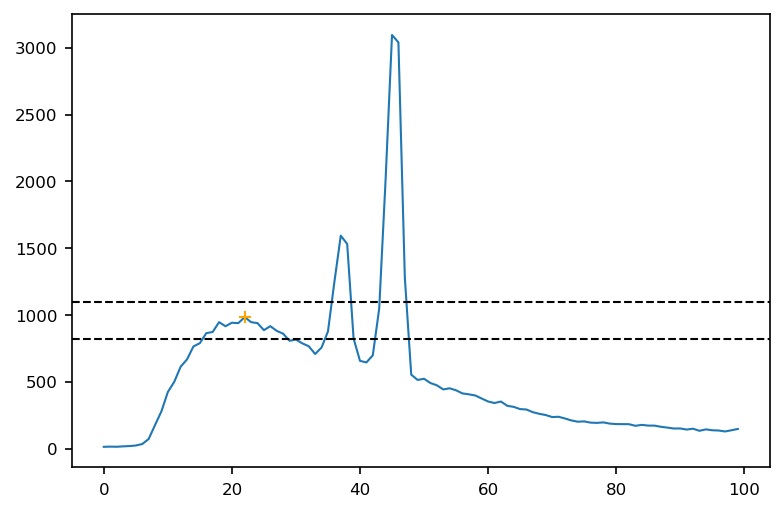

(47.2, 984.0)


In [210]:
# set these 
trial = 3
experiment = 'U35kV t2' # ['I1mA t1', 'I1mA t2', 'U35kV t1', 'U35kV t2']
height = (820, 1100) # adjust (x,y) range until you get one value 
# test
xy = TestMax(trial,experiment,height)
print(xy) # copy this into table below 

In [211]:
# found using func above 
label = 'Max'
tables['I1mA t1'][label] = {    'R_1 / 1/s': (69.7, 180.6), # (x,y)
                                'R_2 / 1/s': (55.0, 349.5), 
                                'R_3 / 1/s': (52.1, 611.0), 
                                'R_4 / 1/s': (47.2, 956.8), 
                                'R_5 / 1/s': (88.2, 30.1)   }
tables['I1mA t2'][label] = {    'R_0 / 1/s': (82.4, 37.2),
                                'R_1 / 1/s': (70.7, 195.5), 
                                'R_2 / 1/s': (56.0, 351.0), 
                                'R_3 / 1/s': (51.1, 666.3), 
                                'R_4 / 1/s': (47.2, 919.4),  }
tables['U35kV t1'][label] = {   'R_0 / 1/s': (48.2, 540.2),
                                'R_1 / 1/s': (45.2, 682.9), 
                                'R_2 / 1/s': (47.2, 824.0), 
                                'R_3 / 1/s': (47.2, 976.7),  }
tables['U35kV t2'][label] = {   'R_0 / 1/s': (47.2, 473.8),
                                'R_1 / 1/s': (47.2, 631.5), 
                                'R_2 / 1/s': (47.2, 819.2), 
                                'R_3 / 1/s': (47.2, 984.0),  } 

# Emission lines
* What is the $n\lambda$ of the two emission lines? What is their FWHM?

In [218]:
def TestEmission(trial,experiment,height) : 
    # test
    yTableKey  = 'R_'+str(trial)+' / 1/s'
    x = tables[experiment][yTableKey]
    emission = FindMax(x, height=height)
    if(len(emission) == 2 ) : 
        xy1 = OneFindMaxToXY(emission[0], xarr = tables[experiment]['n&l / pm'], yarr = tables[experiment][yTableKey])
        xy2 = OneFindMaxToXY(emission[1], xarr = tables[experiment]['n&l / pm'], yarr = tables[experiment][yTableKey])
        return xy1, xy2
    else:
        return None, None

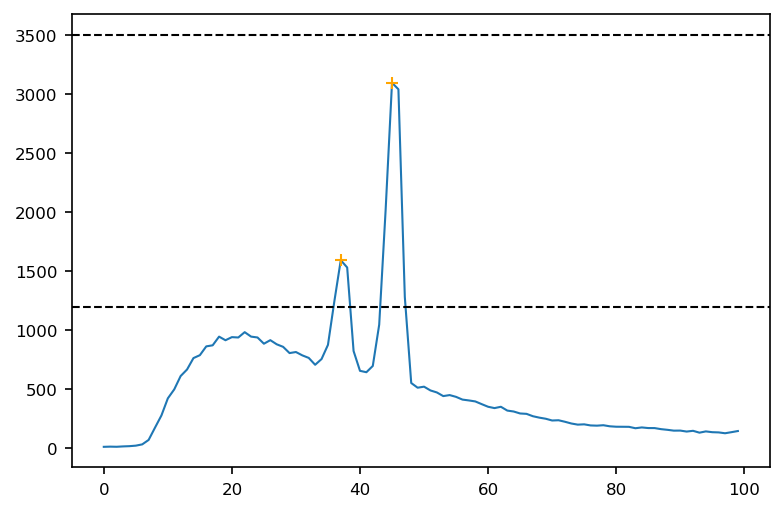

==== U35kV t2: R_3 / 1/s ====
Line 1: (61.9, 1593.6)
Line 2: (69.7, 3095.2)


In [262]:
# set these 
trial = 3
experiment = 'U35kV t2' # ['I1mA t1', 'I1mA t2', 'U35kV t1', 'U35kV t2']
height = (1200, 3500) # adjust (x,y) range until you get one value 
# test
xy1, xy2 = TestEmission(trial,experiment,height)
print('==== '+experiment+': R_'+str(trial)+' / 1/s ====')
print('Line 1:', xy1) # copy this into table below 
print('Line 2:', xy2) # copy this into table below 

In [148]:
# found by eye using func above 
label = 'line1'
tables['I1mA t1'][label] = {    'R_1 / 1/s': (None, None), # no lines!
                                'R_2 / 1/s': (61.9, 569.5), 
                                'R_3 / 1/s': (61.9, 1076.6), 
                                'R_4 / 1/s': (61.9, 1588.1), 
                                'R_5 / 1/s': (None, None)   }
tables['I1mA t2'][label] = {    'R_0 / 1/s': (None, None),
                                'R_1 / 1/s': (None, None), 
                                'R_2 / 1/s': (61.9, 577.1), 
                                'R_3 / 1/s': (61.9, 1118.9), 
                                'R_4 / 1/s': (61.9, 1555.4),  }
tables['U35kV t1'][label] = {   'R_0 / 1/s': (61.9, 955.8),
                                'R_1 / 1/s': (61.9, 1204.0), 
                                'R_2 / 1/s': (61.9, 1442.1), 
                                'R_3 / 1/s': (61.9, 1643.0),  }
tables['U35kV t2'][label] = {   'R_0 / 1/s': (61.9, 846.9),
                                'R_1 / 1/s': (61.9, 1091.5), 
                                'R_2 / 1/s': (61.9, 1360.1), 
                                'R_3 / 1/s': (61.9, 1593.6),  } 

In [263]:
# found by eye using func above 
label = 'line2'
tables['I1mA t1'][label] = {    'R_1 / 1/s': (None, None), # no lines!
                                'R_2 / 1/s': (69.7, 1047.4), 
                                'R_3 / 1/s': (69.7, 2058.2), 
                                'R_4 / 1/s': (69.7, 3052.0), 
                                'R_5 / 1/s': (None, None)   }
tables['I1mA t2'][label] = {    'R_0 / 1/s': (None, None),
                                'R_1 / 1/s': (None, None), 
                                'R_2 / 1/s': (69.7, 1040.0), 
                                'R_3 / 1/s': (69.7, 2120.9), 
                                'R_4 / 1/s': (69.7, 3011.4),  }
tables['U35kV t1'][label] = {   'R_0 / 1/s': (69.7, 2047.9),
                                'R_1 / 1/s': (69.7, 2458.6), 
                                'R_2 / 1/s': (69.7, 2865.1), 
                                'R_3 / 1/s': (69.7, 3200.9),  }
tables['U35kV t2'][label] = {   'R_0 / 1/s': (69.7, 1785.0),
                                'R_1 / 1/s': (69.7, 2253.0), 
                                'R_2 / 1/s': (69.7, 2674.1), 
                                'R_3 / 1/s': (69.7, 3095.2),  } 

# Scatter
* Plot paramaters against each other and try to find correlations. 
* to $\chi^2$ test